### EDA - Combined Dateset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
data = pd.read_csv('data/cleaned_data/combined_cleaned.csv')
data.head()

,domain,batch,placed_company,designation,age,degree,cs_bg,experience,avg_time,holidays,week_back,city,skills,graduated,salary
0,Web Development Using Python Django,BCK01,VNC Digital Services,Software Engineer,22.0,No Degree,No,No,9.0,No,0.0,Bangalore,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,3.00
1,Web Development Using Node.js Express,BCK01,Emstell Technology Consulting,Software Engineer,21.0,Degree,No,No,12.0,No,2.0,WFH,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,2.16
2,Web Development Using Python Django,BCK01,Creative Panda,Node JS Developer,22.0,Degree,Yes,No,9.0,Yes,4.0,Bangalore,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,2.40
3,MERN Stack,BCK01,NORQ Technologies,Software Developer,23.0,No Degree,No,No,11.0,Yes,7.0,Chennai,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,3.55
4,Web Development Using Python Django,BCK01,ActionFi,Software Engineer,22.0,No Degree,No,No,10.0,No,4.0,Bangalore,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,2.40


In [3]:
data.shape

(670, 15)

Dataset contains 670 rows and 15 columns

In [4]:
print(data.columns.values)

['domain' 'batch' 'placed_company' 'designation' 'age' 'degree' 'cs_bg'
 'experience' 'avg_time' 'holidays' 'week_back' 'city' 'skills'
 'graduated' 'salary']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domain          670 non-null    object 
 1   batch           670 non-null    object 
 2   placed_company  670 non-null    object 
 3   designation     670 non-null    object 
 4   age             670 non-null    float64
 5   degree          670 non-null    object 
 6   cs_bg           670 non-null    object 
 7   experience      670 non-null    object 
 8   avg_time        670 non-null    float64
 9   holidays        670 non-null    object 
 10  week_back       670 non-null    float64
 11  city            670 non-null    object 
 12  skills          670 non-null    object 
 13  graduated       670 non-null    object 
 14  salary          670 non-null    float64
dtypes: float64(4), object(11)
memory usage: 78.6+ KB


In [6]:
# Dropping column batch
data = data.drop('batch', axis=1)

#### Descriptive Statistics

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,670.0,22.323881,1.242447,19.0,22.00,22.0,23.0,31.0
avg_time,670.0,10.620896,1.985639,7.0,9.25,10.0,12.0,16.0
week_back,670.0,3.395522,2.413275,0.0,1.00,4.0,5.0,7.0
salary,670.0,4.534224,1.693921,1.8,3.60,4.3,5.0,30.0


* Average age of students in Brocamp is 22
* Min age is 19 --> Students joined staright after plus two
* Max age is 31 --> There are people from other professoins who is joining Brocamp
* Average time spent by students is 10.6 hours, which is higher than industrial average (8 hours)
* The least avg time is 7 --> Most possibly day scholars
* Max avg time recorde is 16 --> Students who are putting extra efforts - check corr with salary
* On an average 3 week backs are recieved to the sutdents
* There are students who got zero weekbacks
* Max salary students recieved is 30 LPA - (in UK)
* Min Salary is 1.8 LPA --> May be from early batches
* On an average students get placed with a salary of 4.5 LPA
* The age and salary seems to have right skewed distrubtion (outliers in rightside)

#### Missing values

In [8]:
# Checking for null values
(data.isnull().sum()/len(data))*100

domain            0.0
placed_company    0.0
designation       0.0
age               0.0
degree            0.0
cs_bg             0.0
experience        0.0
avg_time          0.0
holidays          0.0
week_back         0.0
city              0.0
skills            0.0
graduated         0.0
salary            0.0
dtype: float64

In [9]:
# Checking for duplicated values
data.duplicated().sum()

2

The dataset does not have any null values (which were treated in the previous stage) and neither does it have duplicated entries.

#### Data Quality Check

In [10]:
# Function for checking unique values in columsn
def get_unique(column):
    data[column] = data[column].str.lower()
    data[column] = data[column].str.strip()
    unique = data[column].value_counts()
    
    return unique

##### 1. Domain Column

In [11]:
get_unique('domain')

mern stack                                       341
mobile development using flutter                 132
web development using python django               76
web development using python django + react       37
mean stack                                        18
golang                                            14
mobile development using android kotlin            9
machine learning                                   9
web development using node.js express              9
devops                                             8
cybersecurity                                      7
mobile development using swift                     3
game development using unity                       2
data science                                       2
frontend development using react                   1
blockchain                                         1
web development using python django + angular      1
Name: domain, dtype: int64

##### 2. placed_company

In [12]:
data['placed_company'].nunique()

459

* Brocamp has placed students 459 companies
As this is not relevent to our problem statement we can drop this column

In [13]:
data = data.drop('placed_company', axis=1)
data.head()

,domain,designation,age,degree,cs_bg,experience,avg_time,holidays,week_back,city,skills,graduated,salary
0,web development using python django,Software Engineer,22.0,No Degree,No,No,9.0,No,0.0,Bangalore,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,3.00
1,web development using node.js express,Software Engineer,21.0,Degree,No,No,12.0,No,2.0,WFH,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,2.16
2,web development using python django,Node JS Developer,22.0,Degree,Yes,No,9.0,Yes,4.0,Bangalore,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,2.40
3,mern stack,Software Developer,23.0,No Degree,No,No,11.0,Yes,7.0,Chennai,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,3.55
4,web development using python django,Software Engineer,22.0,No Degree,No,No,10.0,No,4.0,Bangalore,"Angular, Express, Node, MongoDB, MySQL, Typesc...",Yes,2.40


##### 3. designation 

In [14]:
# Adjnustin pandas settings for printing full values
pd.set_option('display.max_rows', None)

print(get_unique('designation'))

# # Reset the display option to its default value
# pd.reset_option('display.max_rows')

full stack developer                         81
software engineer                            61
flutter developer                            58
software developer                           40
mern stack developer                         36
python developer                             16
associate software engineer                  15
junior software engineer                     13
junior software developer                    13
junior developer                             11
node js developer                            10
junior full stack developer                   9
associate product engineer                    8
junior flutter developer                      8
jr. software engineer                         8
trainee software engineer                     7
backend developer                             6
react developer                               6
front end developer                           6
software engineer trainee                     6
node.js developer                       

* We can see same entries in different formats, may be has extra whitespaces
* Some records are junior, while others has jr.

In [15]:
# Stripping values for removeing extra whitespaces
data['designation'] = data['designation'].str.strip()

print(get_unique('designation'))

full stack developer                         81
software engineer                            61
flutter developer                            58
software developer                           40
mern stack developer                         36
python developer                             16
associate software engineer                  15
junior software engineer                     13
junior software developer                    13
junior developer                             11
node js developer                            10
junior full stack developer                   9
associate product engineer                    8
junior flutter developer                      8
jr. software engineer                         8
trainee software engineer                     7
backend developer                             6
react developer                               6
front end developer                           6
software engineer trainee                     6
node.js developer                       

In [16]:
# Replaceing variations to correct format
replacements = {'jr. software engineer': 'junior software engineer', 'node.js developer ': 'nodejs developer', 'node js developer ': 'nodejs developer',
               'software engineer trainee': 'trainee software engineer', 'software development engineer-1': 'software development engineer',
               'mern developer': 'mern stack developer', 'full stack web developer': 'full stack developer', 'back end developer': 'backend developer',
               'full-stack developer': 'full stack developer', 'mern - stack developer': 'mern stack developer',
               'front-end developer': 'frontend developer', 'front end developer': 'frontend developer',
               'jr. software developer': 'junior software developer', 'sde-1': 'software developer',
               'fullstack developer': 'full stack developer', 'mobile application developer flutter': 'flutter developer',
               'flutter + firebase developer': 'flutter developer ', 'back-end developer': 'backend developer',
               'jr. react developer': 'junior react developer', 'trainee-software engineer': 'trainee software engineer',
               'software development engineer trainee': 'trainee software engineer', 'flutter developer (android/ios)': 'flutter developer',
               'trainee - software developer': 'trainee software developer', 'trainee-software developer': 'trainee software developer', 
               'software engineer(backend)': 'software engineer', 'software developer - trainee': 'trainee software developer',
               'jr.web developer': 'junior web developer', 'jr. react & python developer': 'junior fullstack python developer', 'trainee - software engineer': 'trainee software engineer',
               'oftware development engineer 1': 'software development engineer', 'software engineer (trainee)': 'trainee software engineer',
               'junior node js developer': 'junior nodejs developer', 'jr. app developer ': 'junior app developer',
               'software engineer 1': 'software engineer', 'jr. ml engineer': 'junior ml engineer', 'associate product engineer.': 'associated product engineer',
               'jr. developer': 'junior developer', 'flutter devoloper': 'flutter developer', 'jr. react js developer': 'junior react developer',
               'backend developer (django)': 'bakcend developer', 'fluttter developer': 'flutter developer', 'jr. full stack developer': 'junior full stack developer',
               'junior - full - stack developer': 'junior full stack developer', 'junior full-stack developer': 'junior full stack developer',
               'golang developer(member, technical staff)': 'golang devleoper', 'jr flutter developer': 'junior flutter developer', 'fullstack engineer': 'full stack engineer',
               'jr. flutter developer': 'junior flutter developer', 'junior software engineer(se 1)': 'junior software engineer',
               'golang devleoper': 'golang developer', 'fulll stack developer': 'full stack developer', 'jr node js developer': 'junior nodejs developer',
               'react js developer': 'react developer', 'flutter deevloper': 'flutter developer', 'node.js developer': 'node js developer',
               'jr software engineer': 'junior software engineer', 'bakcend developer': 'backend developer', 'jr. app developer': 'junior app developer',
               'reactjs developer': 'react developer', 'go developer': 'golang developer', 'junior software engineer (android)': 'junior software engineer',
               'jr. machine learning engineer': 'junior machine learning engineer', 'jr full stack python developer': 'junior full stack developer',
               'junior ml engineer': 'junior machine learning engineer', 'node js developer': 'nodejs developer', 'full stack developer': 'fullstack developer',
               'junior full stack developer': 'junior fullstack developer'}

data['designation'] = data['designation'].replace(replacements)
data['designation'].value_counts()

fullstack developer                      81
flutter developer                        64
software engineer                        63
mern stack developer                     41
software developer                       41
junior software engineer                 26
trainee software engineer                18
junior software developer                16
python developer                         16
associate software engineer              15
nodejs developer                         13
junior developer                         12
backend developer                        11
junior flutter developer                 10
full stack developer                      9
junior fullstack developer                9
software development engineer             9
frontend developer                        9
react developer                           8
associate product engineer                8
devops engineer                           5
angular developer                         5
web developer                   

##### 4. city

In [17]:
get_unique('city')

bangalore                    254
wfh                          235
manjeri malappuram            93
chennai                       20
calicut                       14
hyderabad                     11
on site                       11
nagercoil                      8
manjeri                        8
chennai works from office      5
ernakulam                      4
kochi                          2
office                         2
pune                           2
trivandrum                     1
Name: city, dtype: int64

* Bangalore is the city that has more placements, which has simlar number to work from home.
* Some entries as in different format like `manjeri`, and `manjeri malappuarm`
* Most of these data is imputed

In [18]:
replacements = {'manjeri malappuram': 'manjeri', 'on site': 'others', 'chennai works from office': 'chennai',
               'office': 'others'}

data['city'] = data['city'].replace(replacements)
data['city'].value_counts()

bangalore     254
wfh           235
manjeri       101
chennai        25
calicut        14
others         13
hyderabad      11
nagercoil       8
ernakulam       4
kochi           2
pune            2
trivandrum      1
Name: city, dtype: int64

* This is not a reliable columns, as `manjeri` shows high numbers, which is not true - Caused by imputation

#### Extracting uniques `Skills`

In [19]:
# Finding all the skills from the dataset
skills = []

for i in range(len(data)):
    sk = data['skills'][i].split(",")
    
    for j in range(len(sk)):
        skills.append(sk[j])

print(skills)

['Angular', ' Express', ' Node', ' MongoDB', ' MySQL', ' Typescript', ' Html', ' CSS', ' Ajax', ' jquery', ' DataStrures', 'Angular', ' Express', ' Node', ' MongoDB', ' MySQL', ' Typescript', ' Html', ' CSS', ' Ajax', ' jquery', ' DataStrures', 'Angular', ' Express', ' Node', ' MongoDB', ' MySQL', ' Typescript', ' Html', ' CSS', ' Ajax', ' jquery', ' DataStrures', 'Angular', ' Express', ' Node', ' MongoDB', ' MySQL', ' Typescript', ' Html', ' CSS', ' Ajax', ' jquery', ' DataStrures', 'Angular', ' Express', ' Node', ' MongoDB', ' MySQL', ' Typescript', ' Html', ' CSS', ' Ajax', ' jquery', ' DataStrures', 'Angular', ' Express', ' Node', ' MongoDB', ' MySQL', ' Typescript', ' Html', ' CSS', ' Ajax', ' jquery', ' DataStrures', 'Angular', ' Express', ' Node', ' MongoDB', ' MySQL', ' Typescript', ' Html', ' CSS', ' Ajax', ' jquery', ' DataStrures', 'Angular', ' Express', ' Node', ' MongoDB', ' MySQL', ' Typescript', ' Html', ' CSS', ' Ajax', ' jquery', ' DataStrures', 'React', ' Node', ' HTM

In [20]:
cleaned_skills = list(set([skill.lower().strip() for skill in skills if skill.strip()]))

print(cleaned_skills)

['jquary', 'scss', 'node.js', 'postman', 'next', 'vercel', 'socket io', 'expresses', 'js', 'go etc', 'jwt', 'graphql', 'aws', 'nest', 'vim', 'ajax', 'react js', 'tailwind', 'java script', 'html', 'datastrures', 'data structure', 'ms office', 'node js', 'niginx', 'typescipt', 'express js.', 'hasura', 'mysql', 'react. js', 'tailwind css', 'cnn', 'sass', 'redux', 'mongoose', 'nodejs', 'firbase', 'api', 'go', 'firebase', 'mongodb', 'bootstrap', 'socket.io', 'nest js', 'my sql', 'communication', 'flutter', 'computer vision', 'jquery', 'django', 'mui', 'react neative', 'refine', 'node', 'dart', 'git', 'angular', 'html css javascript', 'digital ocean', 'linux', 'python', 'docker', 'tailwindcss', 'opencv', 'jest', 'css', 'express', 'deep learning', 'mui etc..', 'nginx', 'html& css', 'javascript', 'sql', 'react query', 'api integration', 'react', 'mongo db', 'nextj', 'typescript', 'express js']


In [21]:
len(cleaned_skills)

80

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
import re

# Standardize skill names
wordnet_lemmatizer = WordNetLemmatizer()
unique_skills = set()
for skill in cleaned_skills:
    # Convert to lowercase and remove punctuation and white spaces
    skill = skill.lower().replace(".", "").replace(",", "").replace(" ", "")
    # Lemmatize skill name
    skill = wordnet_lemmatizer.lemmatize(skill)
    unique_skills.add(skill)

# Print unique skill names
print(sorted(unique_skills))

['ajax', 'angular', 'api', 'apiintegration', 'aws', 'bootstrap', 'cnn', 'communication', 'computervision', 'cs', 'dart', 'datastructure', 'datastrures', 'deeplearning', 'digitalocean', 'django', 'docker', 'express', 'expressjs', 'firbase', 'firebase', 'flutter', 'git', 'go', 'goetc', 'graphql', 'hasura', 'html', 'html&css', 'htmlcssjavascript', 'j', 'javascript', 'jest', 'jquary', 'jquery', 'jwt', 'linux', 'mongodb', 'mongoose', 'msoffice', 'mui', 'muietc', 'mysql', 'nest', 'nestjs', 'next', 'nextj', 'nginx', 'niginx', 'node', 'nodejs', 'opencv', 'postman', 'python', 'react', 'reactjs', 'reactneative', 'reactquery', 'redux', 'refine', 'sas', 'sc', 'socketio', 'sql', 'tailwind', 'tailwindcss', 'typescipt', 'typescript', 'vercel', 'vim']


In [23]:
len(unique_skills)

70

In [24]:
unique_skills = sorted(list(unique_skills))

replacements = {
    'datastrures': 'datastructures',
    'datastructure': 'datastructures',
    'firbase': 'firebase',
    'expressjs': 'express',
    'html&css': 'html',
    'go': 'mongodb',
    'apiintegration': 'api',
    'nestjs': 'nest',
    'nextj': 'next',
    'sc': 'scss',
    'tailwindcss': 'tailwind',
    'goetc': 'go',
    'niginx': 'nginx',
    'reactjs': 'react',
    'nodejs': 'node',
    'refine': 'refinejs',
    'nextj': 'nextjs',
    'j': 'javascript',
    'reactquery': 'react',
    'msoffice': 'office',
    'muietc': 'mui',
    'computervision': 'computer',
    'digitalocean': 'digital',
    'deeplearning': 'deep',
    'htmlcssjavascript': 'javascript',
    'reactneative': 'react',
    'jquary': 'jquery',
    'cs': 'css',
    'nest': 'nestjs',
    'typescipt': 'typescript',
    'socketio': 'socket'
}

unique_skills_cleaned = set()

# Iterate over the skills list and extract unique skills
for skill in unique_skills:
    # Split the skill string on space and/or dot characters
    parts = re.split(r'[.\s]+', skill.lower())
    # Iterate over the parts and add non-empty and non-stopword parts to the unique_skills set
    for part in parts:
        if part not in replacements and part not in nltk.corpus.stopwords.words('english') and len(part) > 1:
            unique_skills_cleaned.add(part)

# Replace any keywords in the unique skills with their replacements
unique_skills_cleaned = [replacements.get(skill, skill) for skill in unique_skills_cleaned]

# Sort the unique skills list and print it
print(sorted(unique_skills_cleaned))

['ajax', 'angular', 'api', 'aws', 'bootstrap', 'cnn', 'communication', 'dart', 'django', 'docker', 'express', 'firebase', 'flutter', 'git', 'graphql', 'hasura', 'html', 'javascript', 'jest', 'jquery', 'jwt', 'linux', 'mongodb', 'mongoose', 'mui', 'mysql', 'next', 'nginx', 'node', 'opencv', 'postman', 'python', 'react', 'redux', 'sas', 'sql', 'tailwind', 'typescript', 'vercel', 'vim']


In [25]:
len(unique_skills_cleaned)

40

##### Creating columns for each unique skill

In [26]:
# function to extract unique skills from the skills column
def extract_skills(skills):
    extracted_skills = []
    for skill in unique_skills_cleaned:
        pattern = re.compile(skill, re.IGNORECASE)
        if any(pattern.search(s) for s in skills.split(',')):
            extracted_skills.append(skill)
    return extracted_skills

In [27]:
# Creating a copy of the dataframe
skills_df = data.copy()

# extract unique skills from skills column
skills_df['extracted_skills'] = skills_df['skills'].apply(extract_skills)

# create new columns for each unique skill
for skill in unique_skills_cleaned:
    skills_df[skill] = skills_df['extracted_skills'].apply(lambda x: 1 if skill in x else 0)

# drop the extracted_skills column
skills_df = skills_df.drop('extracted_skills', axis=1)

skills_df.head()

,domain,designation,age,degree,cs_bg,experience,avg_time,holidays,week_back,city,...,api,opencv,html,express,firebase,bootstrap,mongodb,typescript,nginx,communication
0,web development using python django,software engineer,22.0,No Degree,No,No,9.0,No,0.0,bangalore,...,0,0,1,1,0,0,1,1,0,0
1,web development using node.js express,software engineer,21.0,Degree,No,No,12.0,No,2.0,wfh,...,0,0,1,1,0,0,1,1,0,0
2,web development using python django,nodejs developer,22.0,Degree,Yes,No,9.0,Yes,4.0,bangalore,...,0,0,1,1,0,0,1,1,0,0
3,mern stack,software developer,23.0,No Degree,No,No,11.0,Yes,7.0,chennai,...,0,0,1,1,0,0,1,1,0,0
4,web development using python django,software engineer,22.0,No Degree,No,No,10.0,No,4.0,bangalore,...,0,0,1,1,0,0,1,1,0,0


In [28]:
skills_df.columns

Index(['domain', 'designation', 'age', 'degree', 'cs_bg', 'experience',
       'avg_time', 'holidays', 'week_back', 'city', 'skills', 'graduated',
       'salary', 'flutter', 'postman', 'next', 'vercel', 'jquery', 'django',
       'javascript', 'mui', 'node', 'jwt', 'dart', 'sas', 'git', 'graphql',
       'hasura', 'sql', 'mysql', 'aws', 'vim', 'angular', 'ajax', 'cnn',
       'linux', 'python', 'redux', 'mongoose', 'tailwind', 'docker', 'react',
       'jest', 'api', 'opencv', 'html', 'express', 'firebase', 'bootstrap',
       'mongodb', 'typescript', 'nginx', 'communication'],
      dtype='object')

In [29]:
# Moving the `salary` column to last
column_to_move = skills_df.pop("salary")

# insert column with insert(location, column_name, column_value)

skills_df.insert(52, "salary", column_to_move)

In [30]:
# Dropping the skills column
skills_df = skills_df.drop('skills', axis=1)

In [31]:
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         670 non-null    object 
 1   designation    670 non-null    object 
 2   age            670 non-null    float64
 3   degree         670 non-null    object 
 4   cs_bg          670 non-null    object 
 5   experience     670 non-null    object 
 6   avg_time       670 non-null    float64
 7   holidays       670 non-null    object 
 8   week_back      670 non-null    float64
 9   city           670 non-null    object 
 10  graduated      670 non-null    object 
 11  flutter        670 non-null    int64  
 12  postman        670 non-null    int64  
 13  next           670 non-null    int64  
 14  vercel         670 non-null    int64  
 15  jquery         670 non-null    int64  
 16  django         670 non-null    int64  
 17  javascript     670 non-null    int64  
 18  mui       

In [32]:
skills_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,670.0,22.323881,1.242447,19.0,22.00,22.0,23.0,31.0
avg_time,670.0,10.620896,1.985639,7.0,9.25,10.0,12.0,16.0
week_back,670.0,3.395522,2.413275,0.0,1.00,4.0,5.0,7.0
flutter,670.0,0.004478,0.066815,0.0,0.00,0.0,0.0,1.0
postman,670.0,0.004478,0.066815,0.0,0.00,0.0,0.0,1.0
next,670.0,0.010448,0.101755,0.0,0.00,0.0,0.0,1.0
vercel,670.0,0.004478,0.066815,0.0,0.00,0.0,0.0,1.0
jquery,670.0,0.350746,0.477560,0.0,0.00,0.0,1.0,1.0
django,670.0,0.013433,0.115205,0.0,0.00,0.0,0.0,1.0
javascript,670.0,0.016418,0.127171,0.0,0.00,0.0,0.0,1.0


In [33]:
# Renaming the skills column name for readability
new_column_names = {'A': 'Column1', 'B': 'Column2', 'C': 'Column3'}

#### Saving feature engineered dataframe to csv

```python
skills_df.to_csv('data/skills_df.csv')
```

### Univariate analysis

#### Distributions of Features and Target

In [34]:
# Seperating Categorical varialbes and Numerical variables
cat_cols = [col for col in skills_df.columns if skills_df[col].dtype == 'object']

num_cols = [col for col in skills_df.columns if skills_df[col].dtype in ['int64', 'float64'] and col != 'salary']

print("Categorical features: ", cat_cols)
print("\nNumerical features: ", num_cols)

Categorical features:  ['domain', 'designation', 'degree', 'cs_bg', 'experience', 'holidays', 'city', 'graduated']

Numerical features:  ['age', 'avg_time', 'week_back', 'flutter', 'postman', 'next', 'vercel', 'jquery', 'django', 'javascript', 'mui', 'node', 'jwt', 'dart', 'sas', 'git', 'graphql', 'hasura', 'sql', 'mysql', 'aws', 'vim', 'angular', 'ajax', 'cnn', 'linux', 'python', 'redux', 'mongoose', 'tailwind', 'docker', 'react', 'jest', 'api', 'opencv', 'html', 'express', 'firebase', 'bootstrap', 'mongodb', 'typescript', 'nginx', 'communication']


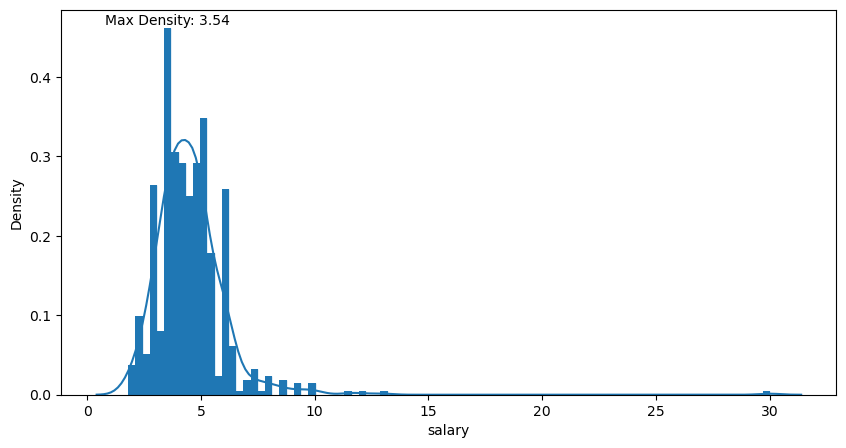

In [35]:
# Distribution of salary
plt.figure(figsize=(10, 5))
sns.histplot(data["salary"], kde=True, stat="density", kde_kws=dict(cut=3), alpha=0.4, edgecolor=(1, 1, 1, 0.4))

# Get the bin edges and heights of the histogram
bin_heights, bin_edges, _ = plt.hist(data["salary"], bins='auto', density=True)

# Find the index of the bin with the maximum height
max_height_index = np.argmax(bin_heights)

# Calculate the value of x that corresponds to the bin with maximum height
x_max_density = (bin_edges[max_height_index] + bin_edges[max_height_index + 1]) / 2

# Label the value of x with maximum density on the plot
plt.text(x_max_density, max(bin_heights), f"Max Density: {x_max_density:.2f}", ha='center', va='bottom')

plt.show()

* Salary follows a right skewed distribution - outliers on the right side (One placement with 30 LPA)
* The maximum density of the salary distribution occurs at salary = 3.54 LPA. This means that the salary value of 3.5 LPA is the most common or frequently occurring salary among the students.

In [36]:
skills_df['salary'].describe()

count    670.000000
mean       4.534224
std        1.693921
min        1.800000
25%        3.600000
50%        4.300000
75%        5.000000
max       30.000000
Name: salary, dtype: float64

* Students from Brototype get placed on an Average salary of 4.5 LPA

In [37]:
# Finding 90th percentile of salary
percentile_90 = np.percentile(skills_df['salary'], 90)

# Print the 90th percentile
print("90th percentile of salaries:", percentile_90)

90th percentile of salaries: 6.0


In [38]:
# Number of students with LPA > 6

count_above_90th_percentile = np.sum(skills_df['salary'] > percentile_90)

# Print the number of values above the 90th percentile
print("Number of values above the 90th percentile:", count_above_90th_percentile)

Number of values above the 90th percentile: 47


* Only 47 out of 670 students recieved salary above 6 LPA

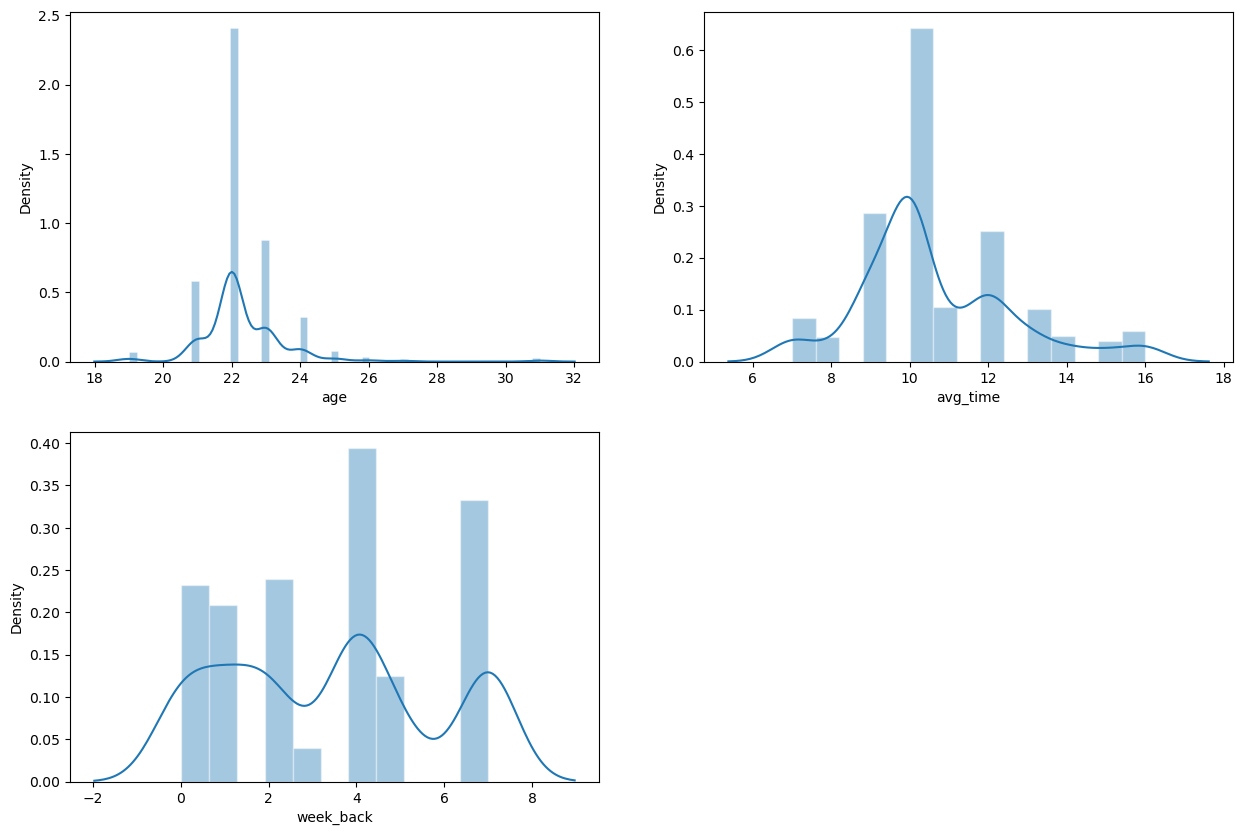

In [39]:
# Distributions of numerical features
num_feat = num_cols[:3]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_feat, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),)
    
    
plt.show()

#### Age
* Age follws a right skewed distribution - fewer students with age above 25 and has a max value of 31 - Indicates people from other industrial experience are attending the program
* Max desnity for age occur for 22 - More number of students are fresh college graduates

#### Averge time spent in office
* The average time spent by students follows a normal distribution with a mean of 10.6
* There are few students who spent 16 hours per day (maximum) and few whom spent 7 hour per day (minimum)

#### Week backs recieved
* The week back recieved can't be treated as numerical feature, have to plot bar chart as it is not a continous variable.
* 4 is the maximum occured week backs
* On an average 3.4 (~3) week backs are recieved to students

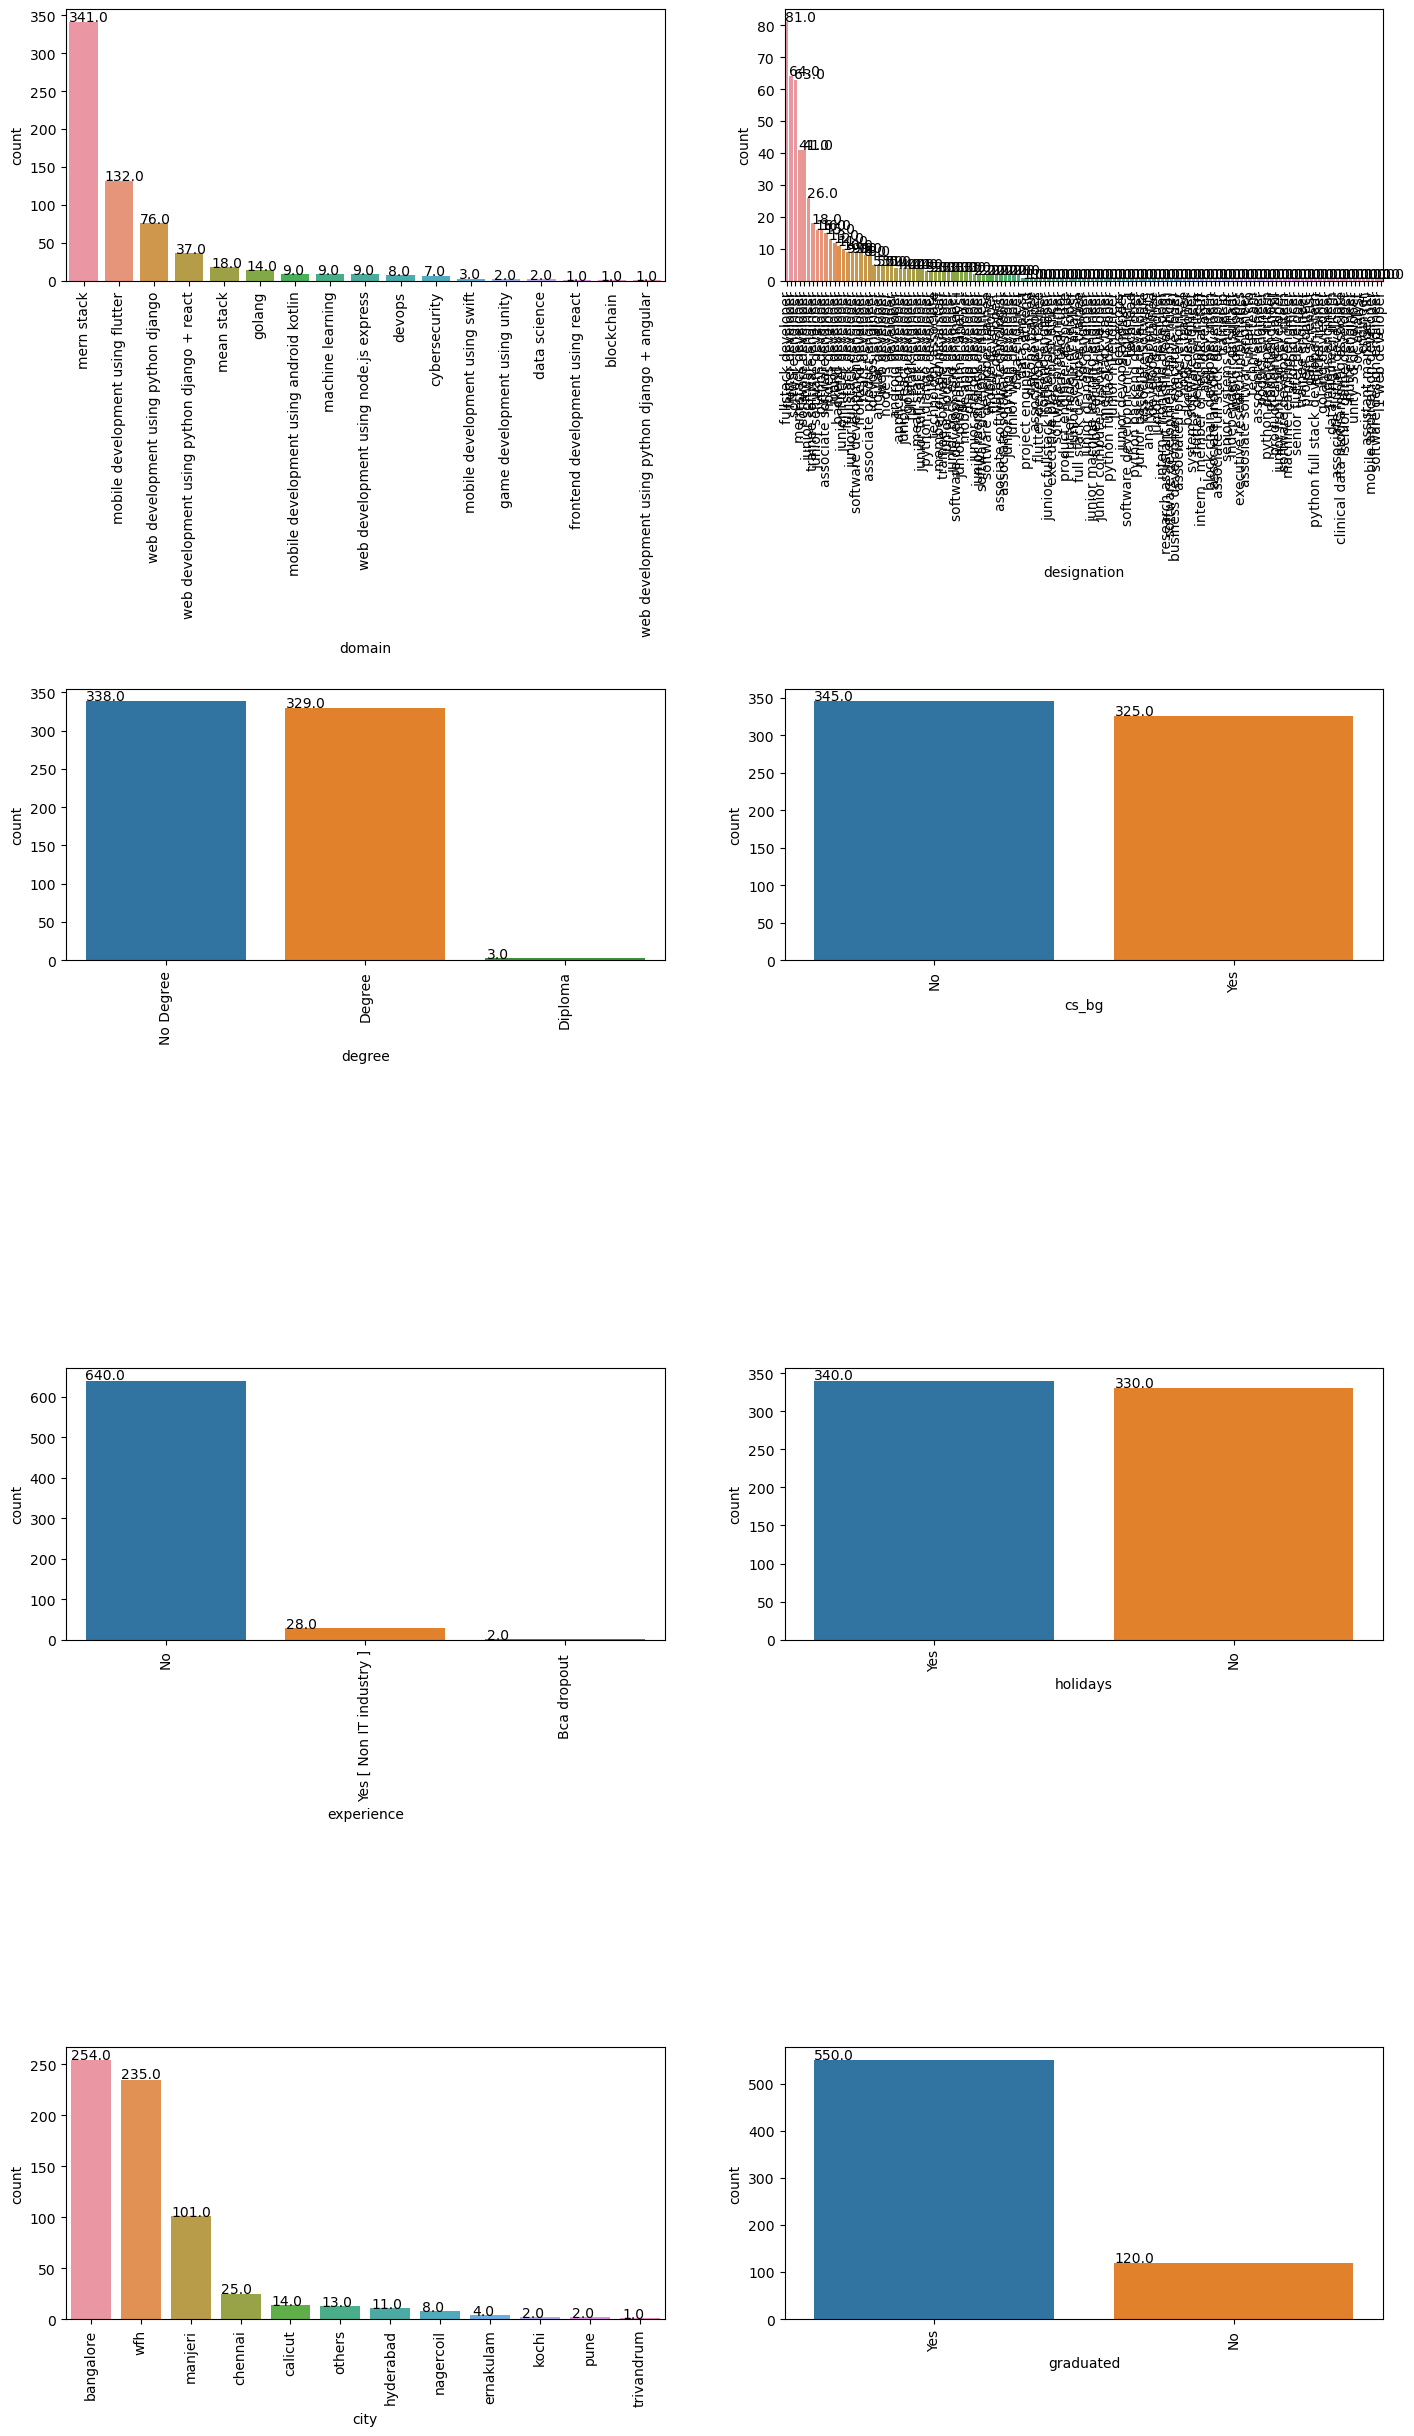

In [51]:
# Count plot of Categorical features
plt.figure(figsize=(17, 30))

for i,col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    plt.subplots_adjust(hspace=1.5)
    
    ax = sns.countplot(data=skills_df, x=col, order= data[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() * 1.005, p.get_height() * 1.005))

### Domain
* Most number of students placed are from **MERN** Stack (341)
* **Flutter** is the second most domain chosen by students (132) followed by **Web Development with Django** (76)
* Number of studends who chose other domain are less than 20 for each

### Degree
* The number of students who has degree and those does't has similar
* Only 2 students has deploma - (May be because of imputation)

### Holidays
* Half of the students chose to spend holidays in the office while other half doesn't

### City
* **Bangalore** has offered most number of placements (254)
* 235 Students are placed with a job that offered **Work From Home**
* **Manjeri** has 101 placements - Not true, due to imputaion

### Did they complete 6 months?
* 550 Studends completed the Brocamp program while 120 has got an job offer before completing the program

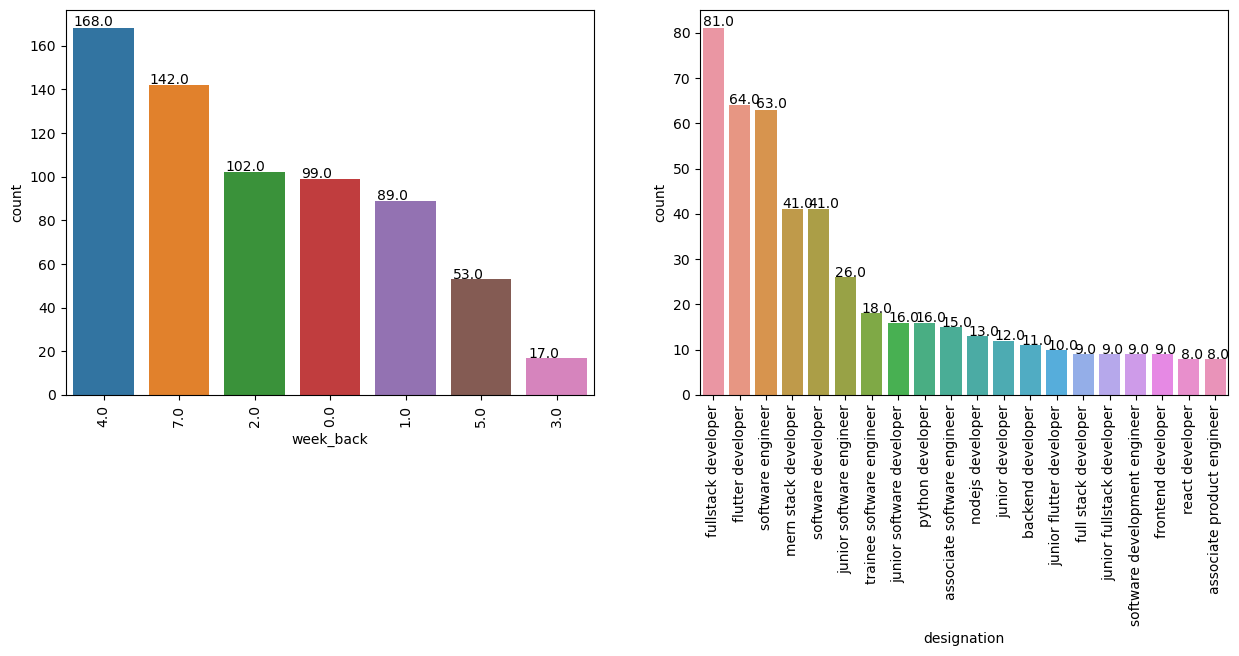

In [55]:
# Count plot for week_back and designation
cols_1 = ['week_back', 'designation']

# Count plot of Categorical features
plt.figure(figsize=(15, 5))

for i, col in enumerate(cols_1, 1):
    plt.subplot(1, 2, i)
    plt.subplots_adjust(hspace=1)
    
    if col == 'designation':
        # Retrieve the top 20 unique values from 'designation' column
        top_20_designations = skills_df['designation'].value_counts().head(20).index
        
        ax = sns.countplot(data=skills_df, x=col, order=top_20_designations)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    else:
        ax = sns.countplot(data=skills_df, x=col,  order= data[col].value_counts().index)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() * 1.005, p.get_height() * 1.005))

* 168 has recieved 4 weekbacks which is the maximum while 99 students graduated with 0 weekbacks
* There are 142 students graduated with 142 weebacks which is the second most value

##### Count plot for skills

In [59]:
# Creating a list for uniques skills in the datframe
skills_list = list(skills_df.iloc[:, 11:51].columns)
print(skills_list)

['flutter', 'postman', 'next', 'vercel', 'jquery', 'django', 'javascript', 'mui', 'node', 'jwt', 'dart', 'sas', 'git', 'graphql', 'hasura', 'sql', 'mysql', 'aws', 'vim', 'angular', 'ajax', 'cnn', 'linux', 'python', 'redux', 'mongoose', 'tailwind', 'docker', 'react', 'jest', 'api', 'opencv', 'html', 'express', 'firebase', 'bootstrap', 'mongodb', 'typescript', 'nginx', 'communication']


In [70]:
# Creating a dataframe for skills for viz
def count_students(skills):
    result = {}
    for skill in skills_list:
        students_count = skills_df[skill].sum()
        result[skill] = students_count
        
    return result

skills_dict = count_students(skills_list)

count_df = pd.DataFrame.from_dict(skills_dict, orient='index', columns=['count'])
count_df.reset_index(inplace=True)
count_df = count_df.rename(columns={'index': 'skill'})
count_df.head()

,skill,count
0,flutter,3
1,postman,3
2,next,7
3,vercel,3
4,jquery,235


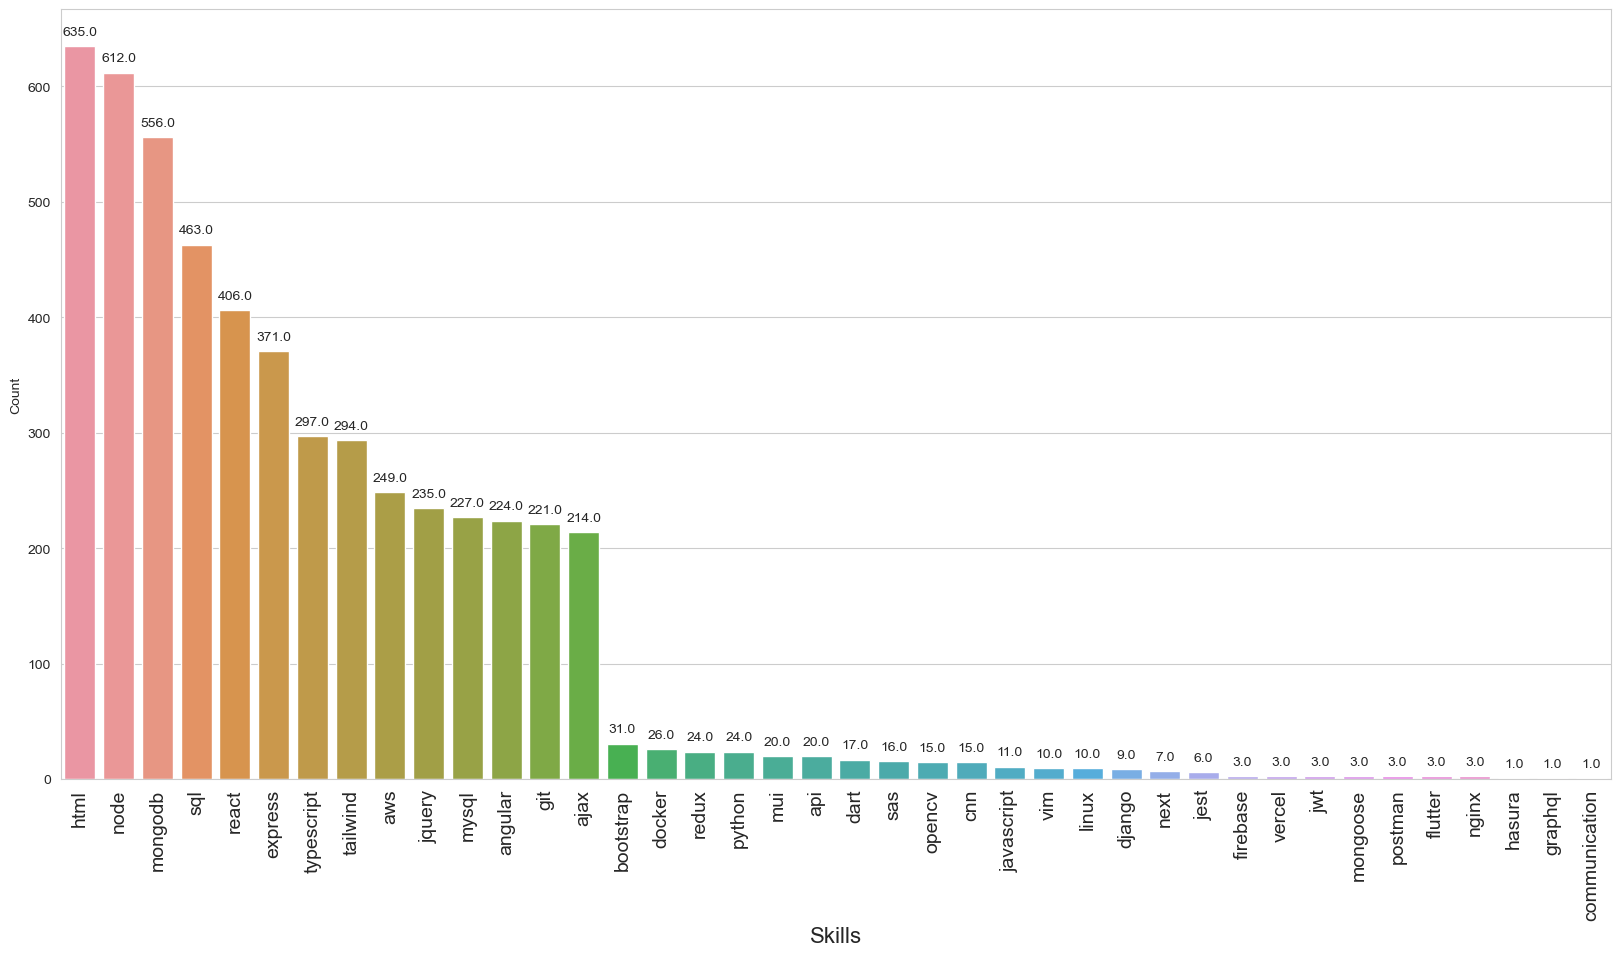

In [76]:
# Plotting bar graph for skills
count_df = count_df.sort_values(by='count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
ax = sns.barplot(x='skill', y='count', data=count_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)

# Annotate the counts on top of the bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add x-axis and y-axis labels
plt.xlabel('Skills', fontsize=16)
plt.ylabel('Count')
plt.show()

* Html is the most common skill - Every student learns Html and Css in the first week
* Node and Mongodb is the next most common skills - Most students are from MERN Stack
* SQL and react follows the list with next most numbers - Students form Python Django also included in this
* Very few number of students has the advanced skills like graphql, hasura, vercel, jest, etc
* There a mismatch in the dataset as flutter shows only 3 entries